<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/QuantumMeasurement_Probability_Observable_mkbahk_20250407.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{Grok: "양자 상태의 물리적 특성(확률, 기대값 등)"에서 확률과 기대값의 정확한 의미와 이 두 가지를 알아낼 수 있는 방법을 Qiskit을 통해 구현해 주세요.}

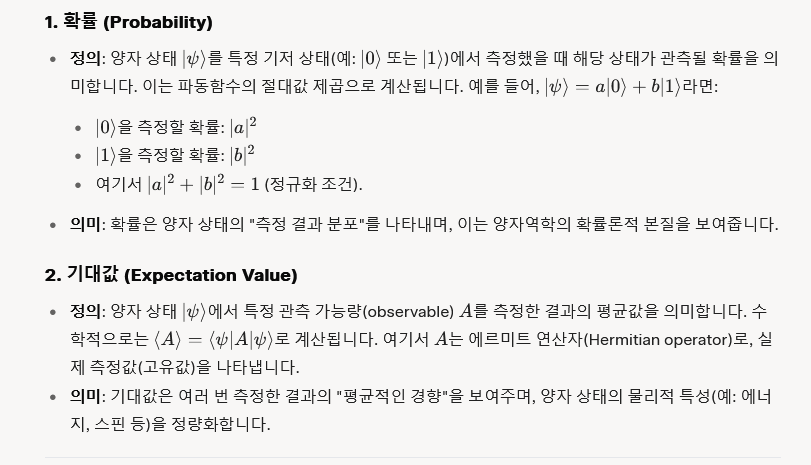

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1
%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 6.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=15c3ea63445ee7aa77cebab94309a425907575ee1caec1f89da1bf20364a2297
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 58.4 MB/s eta 0:00:00
  Cloning https://github.com/qisk

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
from qiskit_aer import Aer
from IPython.display import display, Math
import numpy as np

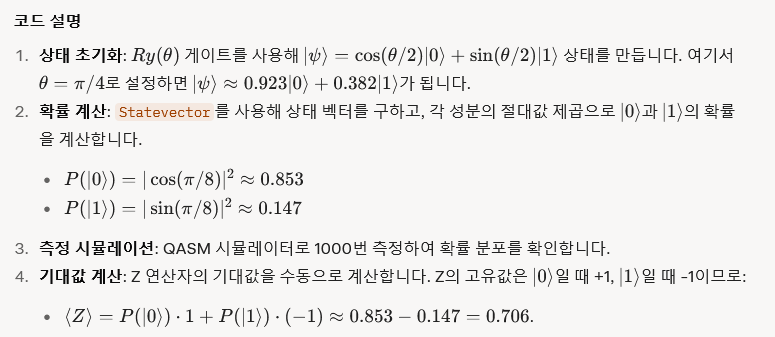

In [3]:
# 1. 양자 회로 생성
qc = QuantumCircuit(1, 1)  # 1개의 큐비트와 1개의 클래식 비트

# 2. 양자 상태 초기화 (예: theta = pi/4로 설정)
theta = np.pi / 4
qc.ry(theta, 0)  # Ry 게이트로 상태를 |ψ⟩ = cos(θ/2)|0⟩ + sin(θ/2)|1⟩로 설정

# 3. 상태 벡터 확인 (확률 계산용)
state = Statevector.from_instruction(qc)
print("양자 상태:", state.data)
prob_0 = np.abs(state[0])**2  # |0⟩의 확률
prob_1 = np.abs(state[1])**2  # |1⟩의 확률
print(f"|0⟩의 확률: {prob_0:.3f}")
print(f"|1⟩의 확률: {prob_1:.3f}")

# 4. 측정 추가 (확률을 시뮬레이션으로 확인)
qc.measure(0, 0)

양자 상태: [0.92387953+0.j 0.38268343+0.j]
|0⟩의 확률: 0.854
|1⟩의 확률: 0.146


In [5]:
# 5. 시뮬레이터 실행
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1000)  # 1000번 측정
result = job.result()

In [6]:
counts = result.get_counts()
print("측정 결과 (counts):", counts)

측정 결과 (counts): {'1': 146, '0': 854}


In [7]:
# 6. 기대값 계산 (Z 연산자의 기대값)
# Z 연산자의 고유값: |0⟩ → +1, |1⟩ → -1
# 기대값 = P(|0⟩) * (+1) + P(|1⟩) * (-1)
expectation_value = prob_0 * 1 + prob_1 * (-1)
print(f"Z 연산자의 기대값: {expectation_value:.3f}")

Z 연산자의 기대값: 0.707


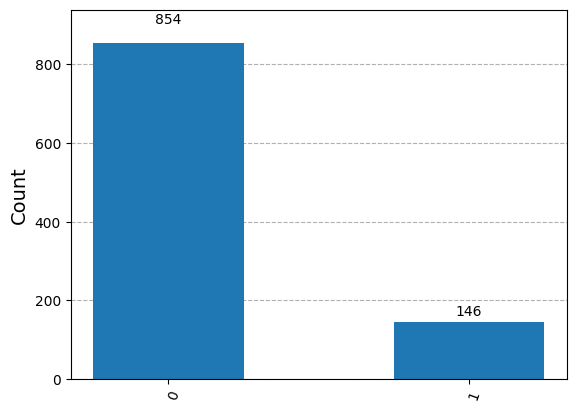

In [8]:
# 7. 결과 시각화
plot_histogram(counts)

* 확률: 특정 기저 상태가 측정될 가능성(∣a∣^2)을 나타내며, Qiskit에서는 상태 벡터나 측정 결과를 통해 구합니다.
* 기대값: 관측 가능량의 평균값(⟨A⟩)을 나타내며, 확률과 연산자의 고유값을 조합해 계산합니다.